<a href="https://colab.research.google.com/github/YLysov0017/Pproject/blob/master/EXAMNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 39.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=acab015f2d01f00f162c6c7f854de5f25086585b3781315523ecd76e5068bf6f
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

from scipy.cluster import hierarchy

In [20]:
df = pd.read_excel("/content/April_9.xlsx")

df

,Результаты поискового запроса,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Статистика сформирована: 09.04.2019 13:06:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Реквизиты документа,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4972,4963,WSR/1.-1749/2017,2017-11-01 00:00:00,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4973,4964,WSR/1.-1751/2017,2017-11-01 00:00:00,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4974,4965,WSR/1.-1748/2017,2017-11-01 00:00:00,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4975,4966,WSR/1.-1747/2017,2017-11-01 00:00:00,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


In [21]:
df = df.drop(df.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])
df = df.drop(axis=1, columns="Результаты поискового запроса")
df = df.rename(columns={"Unnamed: 1": "№ Документа", "Unnamed: 2": "Дата регистрации",
              "Unnamed: 3": "Исх. № Дата", "Unnamed: 4": "Адресат",
              "Unnamed: 5": "Автор", "Unnamed: 6": "Краткое содержание",
              "Unnamed: 7": "Примечание"})

In [22]:
df

,№ Документа,Дата регистрации,Исх. № Дата,Адресат,Автор,Краткое содержание,Примечание
10,WSR/1-838/2019,2019-04-09 00:00:00,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),Вх - О возможности использования сетевого изда...,NaN
11,WSR/1-837/2019,2019-04-09 00:00:00,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,Вх - Об участии в совещании по вопросу доработ...,NaN
12,WSR/1-835/2019,2019-04-09 00:00:00,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),Вх - О командировании Саликовой К. и Глушко Д....,NaN
13,WSR/1-834/2019,2019-04-09 00:00:00,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,Вх - Об участии в Чемпионате мира по профессио...,NaN
14,WSR/1-833/2019,2019-04-09 00:00:00,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,Вх - Об участии в церемонии открытия Вузовског...,NaN
...,...,...,...,...,...,...,...
4972,WSR/1.-1749/2017,2017-11-01 00:00:00,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,Протокол заседания Президиума Совета при Прези...,NaN
4973,WSR/1.-1751/2017,2017-11-01 00:00:00,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,О проведении 21.11.2017 заседания организацион...,NaN
4974,WSR/1.-1748/2017,2017-11-01 00:00:00,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN
4975,WSR/1.-1747/2017,2017-11-01 00:00:00,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,Протокол заседания рабочей группы приоритетног...,NaN


In [ ]:
'''
df_cleaned = df.dropna()
df_cleaned.describe()
# Нет не заполненных клеток
'''
'''
dupls = df.duplicated()
count = 0
for i in dupls:
  if (i): count +=1

count
#Дублей тоже нет
'''

Q1 =  df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_IQR = df[(df > (Q1-1.5*IQR )) & (df < (Q3+1.5*IQR))]

df = df_IQR.copy()
df.describe()
#Подрезал максимум межквартильным размахом


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,175.000000,175.000000,174.000000,174.000000,178.000000,178.000000,178.000000,176.000000,174.000000,177.000000,178.000000,178.000000
mean,13.000618,2.279486,2.362457,19.382184,98.655172,2.295112,2.029270,0.361854,1.570000,4.908678,0.953198,2.611685,746.893258
std,0.811827,1.037469,0.249503,3.060238,12.386201,0.625851,0.998859,0.124453,0.540359,2.116495,0.222049,0.709990,314.907474
min,11.030000,0.740000,1.700000,11.200000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.595000,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.247500,3.180000,0.780000,1.937500,500.500000
50%,13.050000,1.830000,2.360000,19.450000,97.500000,2.355000,2.135000,0.340000,1.545000,4.600000,0.960000,2.780000,673.500000
75%,13.677500,3.010000,2.545000,21.500000,106.750000,2.800000,2.875000,0.437500,1.950000,6.075000,1.120000,3.170000,985.000000
max,14.830000,5.190000,2.920000,27.000000,134.000000,3.880000,5.080000,0.660000,2.960000,10.520000,1.450000,4.000000,1680.000000


In [ ]:
min_max_scaler = MinMaxScaler()
df["Proline"] = df["Proline"].astype('float64')
num_features = df.select_dtypes(include=['float64']).columns
df_scaled = df.copy()
df_scaled[num_features] = min_max_scaler.fit_transform(df[num_features])
df = df_scaled.copy()
df = df.fillna(df.mean())
df
# Отскалировано
# Категориальных признаков нет

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.217978,0.598361,0.278481,0.890625,0.627586,0.573840,0.283019,0.737255,0.471861,0.577320,0.970696,0.561341
1,0.571053,0.233708,0.360656,0.000000,0.468750,0.575862,0.510549,0.245283,0.341176,0.335498,0.587629,0.780220,0.550642
2,0.560526,0.364045,0.795082,0.468354,0.484375,0.627586,0.611814,0.320755,0.941176,0.476190,0.567010,0.695971,0.646933
3,0.878947,0.271910,0.655738,0.354430,0.671875,0.989655,0.664557,0.207547,0.694118,0.705628,0.391753,0.798535,0.857347
4,0.581579,0.415730,0.959016,0.620253,0.750000,0.627586,0.495781,0.490566,0.552941,0.329004,0.577320,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.345952,0.614754,0.588608,0.390625,0.241379,0.056962,0.735849,0.254902,0.694805,0.164948,0.172161,0.329529
174,0.623684,0.712360,0.639344,0.746835,0.500000,0.282759,0.086498,0.566038,0.392157,0.651515,0.226804,0.106227,0.336662
175,0.589474,0.795506,0.459016,0.556962,0.781250,0.210345,0.073840,0.566038,0.368627,0.965368,0.113402,0.106227,0.397290
176,0.563158,0.415730,0.549180,0.556962,0.781250,0.231034,0.071730,0.754717,0.411765,0.867965,0.123711,0.128205,0.400856


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

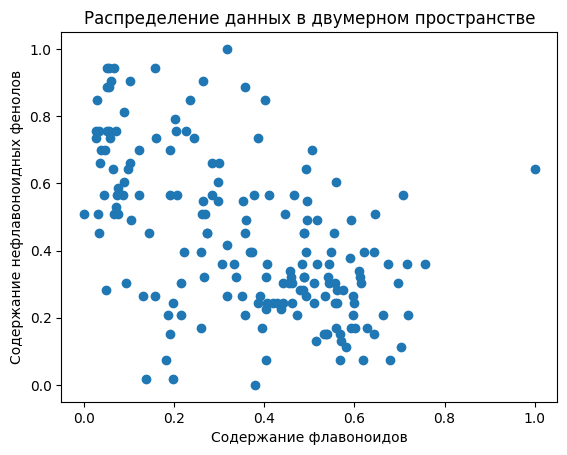

In [ ]:
plt.scatter(df["Flavanoids"], df["Nonflavanoid_Phenols"])
plt.xlabel('Содержание флавоноидов')
plt.ylabel('Содержание нефлавоноидных фенолов')
plt.title('Распределение данных в двумерном пространстве')

Вычисляем метрики

In [ ]:
# Нормализация данных
X = df[["Flavanoids", "Nonflavanoid_Phenols"]]
x_scaled = StandardScaler().fit_transform(X)

Silhouette Score

Оптимальное число кластеров 2, с баллом 0.5066258048427962


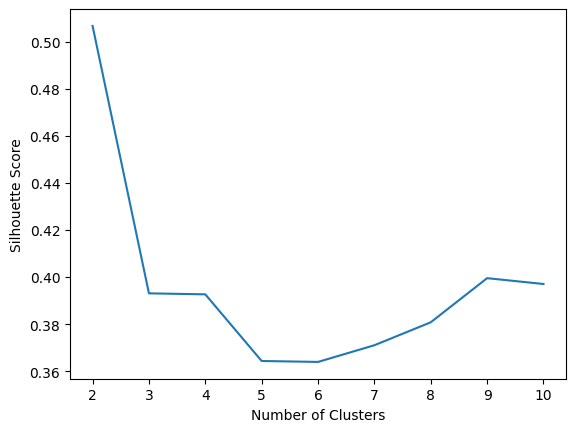

In [ ]:
# Поиск оптимального K
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = silhouette_score(x_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

Методом научного тыка выяснено, что балл выше 0.5 по метрике Silhouette Score дают колонки "Flavanoids", "Nonflavanoid_Phenols". Оптимальное число кластеров для KMeans - 2.


Calinski Harabasz Index

Оптимальное число кластеров 2, с баллом 248.83411582365773


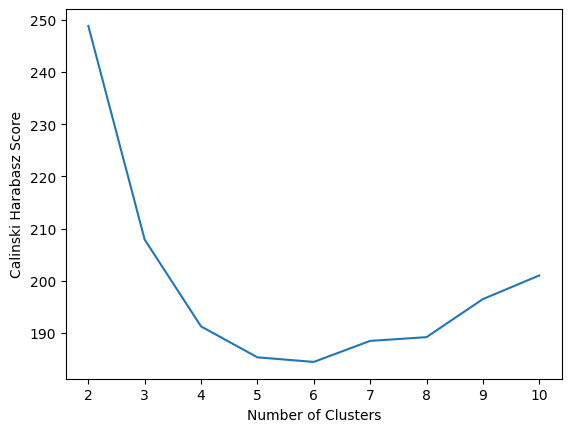

In [ ]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = calinski_harabasz_score(x_scaled, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Davies Bouldin Index

Оптимальное число кластеров 2, с баллом 0.7218110860646295


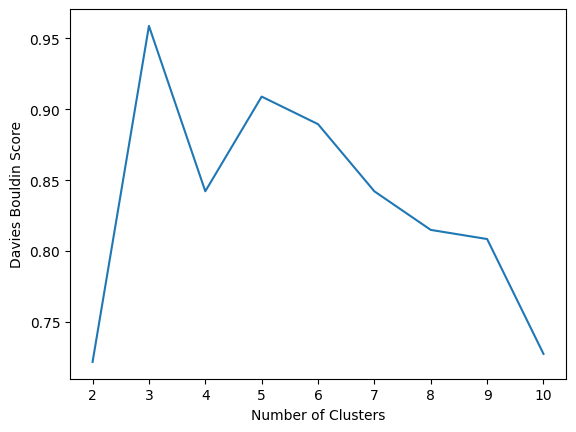

In [ ]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    score = davies_bouldin_score(x_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

Normalized Mutual Information Index не будет в виду отсутствия дискретных значений в датасете.

Ищем оптимальное EPS для DBSCAN

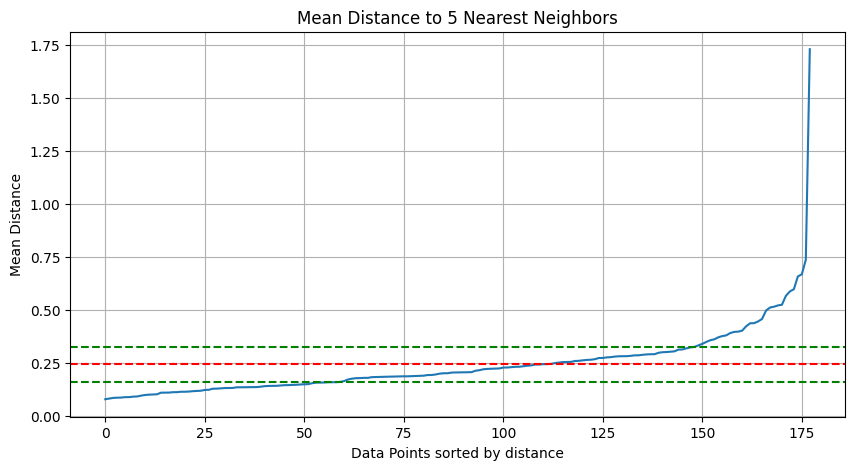

Оптимальный EPS = 0.24410683035505504


In [ ]:
# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(x_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(x_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')
# зеленым отмечаем ПРИМЕРНУЮ графницу оптимального EPS, но это не является стандартным методом, это скорее интуитвивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

Итого: оптимальный EPS - 0.26771799042668415, Ожидаемое количество кластеров - 2.

KMeans

In [ ]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers)
print(cluster_labels)

[[0.48116893 0.28843466]
 [0.16386377 0.66738544]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


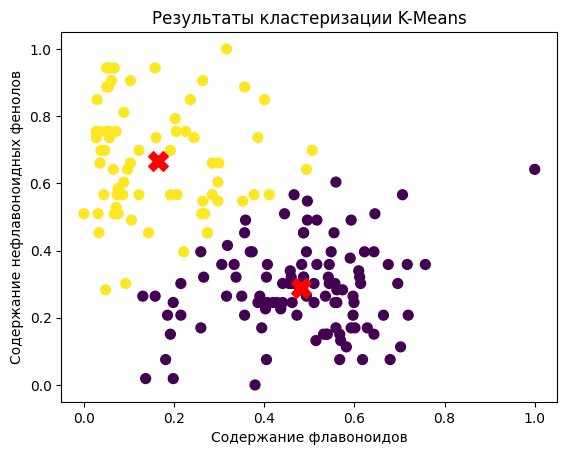

In [ ]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X)

cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_


plt.scatter(df["Flavanoids"], df["Nonflavanoid_Phenols"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Содержание флавоноидов')
plt.ylabel('Содержание нефлавоноидных фенолов')
plt.title('Результаты кластеризации K-Means')
plt.show()

DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.2677, min_samples=5)
dbscan.fit(x_scaled)

labels = dbscan.labels_

labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1,  4,  0,  0,  0,  0,  0,  0,
        4, -1,  2,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  4,  4, -1,  0, -1,  0, -1,  0, -1, -1,  0,  3,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1, -1,  0,  0, -1,
        0,  0, -1, -1,  0,  0,  0, -1, -1,  0,  0,  3,  3,  3, -1,  1,  1,
        2,  1,  1,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2, -1,  3,  3,  3,
        1,  2,  1,  2,  1,  4,  4,  2,  2,  1,  2,  2,  2,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

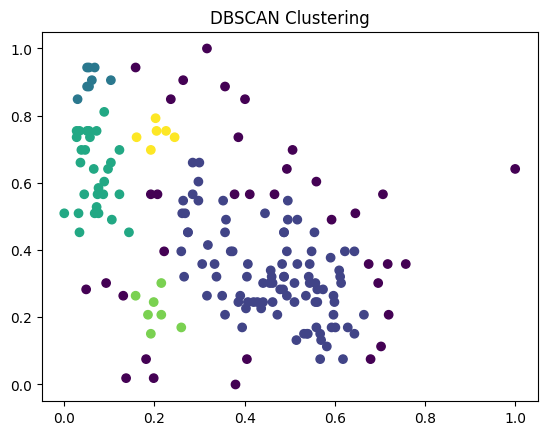

In [ ]:
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

Иерархическая кластеризация

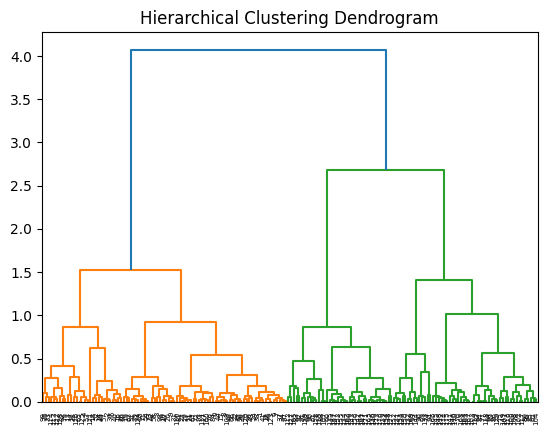

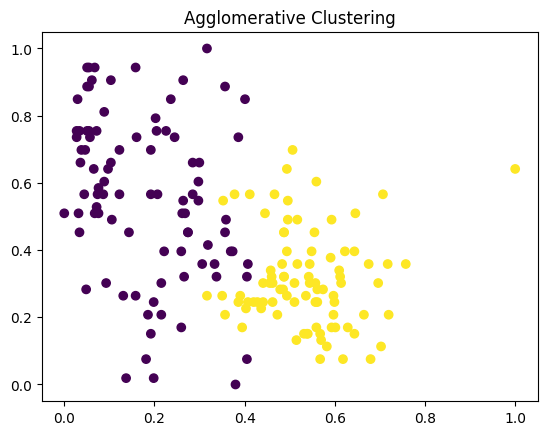

In [ ]:
# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_clustering.fit(X)

# Визуализация дендрограммы

linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним


df['kmeans_cluster'] = kmeans.labels_
df['dbsscan_cluster'] = dbscan.labels_

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)

#P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport

df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))




# 3. Выполните профилирование

#На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма
'''

profile_dbscan0 = ProfileReport(df[df.dbscan_labels == 0])
profile_dbscan1 = ProfileReport(df[df.dbscan_labels == 1])
profile_dbscan2 = ProfileReport(df[df.dbscan_labels == 2])

profile_dbscan0.to_file("profile_dbscan0.html")
profile_dbscan1.to_file("profile_dbscan1.html")
profile_dbscan2.to_file("profile_dbscan2.html")
'''

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".


'\n\nprofile_dbscan0 = ProfileReport(df[df.dbscan_labels == 0])\nprofile_dbscan1 = ProfileReport(df[df.dbscan_labels == 1])\nprofile_dbscan2 = ProfileReport(df[df.dbscan_labels == 2])\n\nprofile_dbscan0.to_file("profile_dbscan0.html")\nprofile_dbscan1.to_file("profile_dbscan1.html")\nprofile_dbscan2.to_file("profile_dbscan2.html")\n'

**Результаты профилирования**

В первом кластере DBSCAN оказалось 93 строки. По большинству переменных обнаружены близкие значения (от 20% до 75%). В колонках Malic Acid, Ash, ASh Aclanity, Magnesium, Color Intensity, Proline встречается по одному нулевому значению, возможно они относятся к одной строке (поврежденной). Также по Heatmap можно увидеть сравнительно высокую корреляцию (как положительную, так и отрицательную) различных переменных. Меньше всего подвержена корреляции колонка Hue. В этом кластере можно увидеть, что содержание алкаголя растет вместе с содержанием флаваноидов, пролина и интенсивностью цвета.

2 кластер: сюда попало 8 строк. Большинство колонок отсюда имеют неповторяющиеся значения и сильную корреляцию. Анализ информации по нему затруднен.

3 кластер: здесь 29 строк. Здесь наблюдается довольно низкая корреляция содержания алкаголя с другими характеристиками. Диапазон значений алкаголя уже, чем в первом кластере, но по гистограмме видно распределение, меньше напоминающее нормальное.